# DSP Lab Assignment 2: Time domain representation of LTI systems

Q.1.For the LTI systems described by the following difference equations, generate its impulse response, and unit step response. Comment on the properties of the system (Stable, Causal, ...)

 <ol>
  <li>$y[n] − 0.5y[n − 1] + 0.25y[n − 2] = 0.5x[n] + 0.2x[n − 1] + 0.2x[n − 2]$  </li>
 <li>$y[n] = 0.77y[n − 1] + x[n] + x[n − 1]$  </li>
  <li>$y[n] = 0.77y[n − 1] + 0.77x[n] + x[n − 1]$ </li>
</ol>

(use function <i>scipy.signal.impulse</i> to determine the impulse response and <i>scipy.signal.lfilter</i> to find the
output)

Details about <i>scipy.signal.impulse</i> can be found here, https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.impulse.html#scipy.signal.impulse



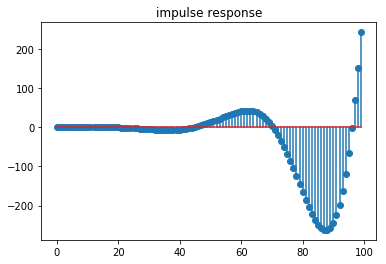

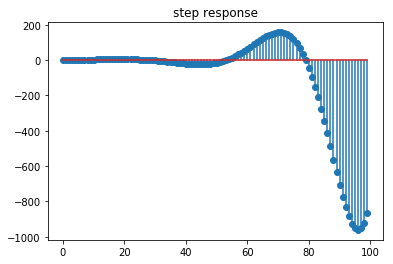

In [25]:
#Write Code
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig

num1=[0.5,0.2,0.2]
den1=[1,-0.5,0.25]
sys1=(num1,den1)


[t1,r1]=sig.impulse(sys1)
n=np.arange(len(r1))

plt.stem(n,r1)
plt.title('impulse response')
plt.show()

t,yout=sig.step(sys1)
plt.title('step response')
plt.stem(n,yout)
plt.show()



# plot impulse and step response for sub-questions 2 and 3 

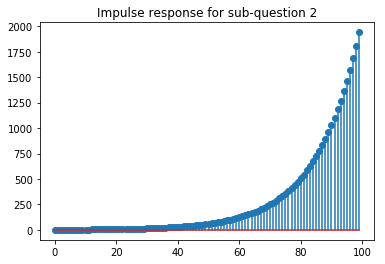

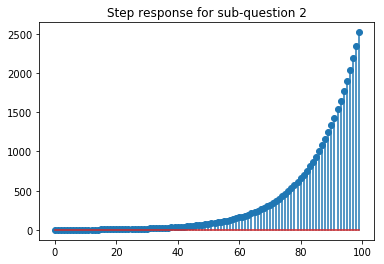

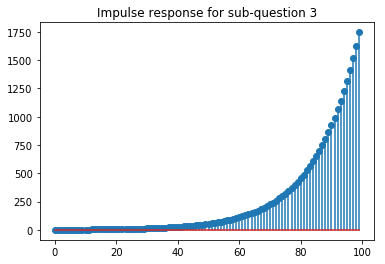

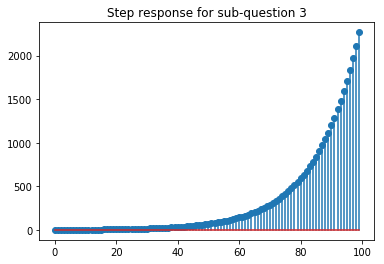

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig

num1=[1,1]
den1=[1,-0.77]
sys1=(num1,den1)

[t1,r1]=sig.impulse(sys1)
n=np.arange(len(r1))

plt.stem(n,r1)
plt.title('Impulse response for sub-question 2')
plt.show()

t,yout=sig.step(sys1)
plt.title('Step response for sub-question 2')
plt.stem(n,yout)
plt.show()


num1=[0.77,1]
den1=[1,-0.77]
sys1=(num1,den1)

[t1,r1]=sig.impulse(sys1)
n=np.arange(len(r1))

plt.stem(n,r1)
plt.title('Impulse response for sub-question 3')
plt.show()

t,yout=sig.step(sys1)
plt.title('Step response for sub-question 3')
plt.stem(n,yout)
plt.show()

The impulse response functions of all three systems do not appear to be bounded.

Hence, it seems all three systems are not stable.

For causal systems, the output can only depend on the current and past input, and not future input.

Hence, y(n)=x(n)+x(n-1)+x(n-2) is causal.

But y(n)+y(n-1)=x(n)+x(n-1)+x(n-2) does not appear to be causal as y(n-1) appears to be dependent on a future input x(n).

Since the terms y(n-1) and x(n) appear in all three systems, they are not causal.

Q.2.Plot the response of the following filters if the input is 
<ul>
  <li>$x[n] = 0.1n + sin(0.1nπ);    0 ≤ n ≤ 60 $  </li>
 <li>$ x[n] = 0.1n + sin(0.1nπ) + w[n];     0 ≤ n ≤ 60;$  </li> 
</ul> $w[n]$ is zero mean uniformly distributed random noise in $[−0.5\,\,  0.5]$.
<ol>
    <li> $y[n] = \frac{1}{4} \sum_{k=0}^3  x[n − k]$ </li>
    <li>$y[n] = \frac{2}{N(N+1)} \sum_{k=0}^{N−1}(N − k)x[n − k]; N = 4$ </li>
    <li>$y[n] − αy[n − 1] = (1 − α)x[n]; α = 3/4 $ </li>
</ol>
    
(use function <i>rand</i> to generate random noise)  https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.rand.html

 <i>uniform</i>  https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.random.uniform.html

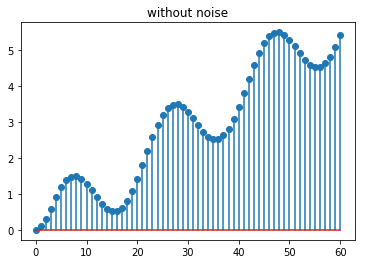

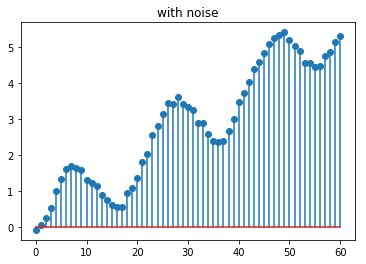

In [17]:
#Write Code
import numpy as np
import matplotlib.pyplot as plt

n=np.arange(61)
x1= 0.1*n + np.sin(0.1*n*np.pi)
w=np.random.uniform(-0.5,0.5,61)
x2=0.1*n+np.sin(0.1*n*np.pi) + w

num1=[0.25,0.25,0.25,0.25]
den1=[1,0,0,0]
sys1=(num1,den1)
r11=sig.lfilter(num1,den1,x1)
r12=sig.lfilter(num1,den1,x2)

plt.stem(n,r11)
plt.title('without noise')
plt.show()

plt.stem(n,r12)
plt.title('with noise')
plt.show()


#noisy signal with 60 samples np.random.uniform(-0.5,0.5,60)

# plot the above functions given in sub parts 2) and 3)

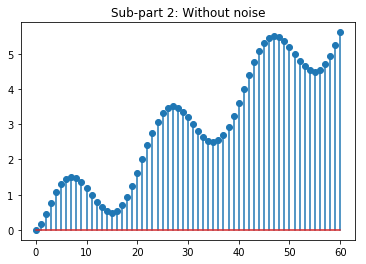

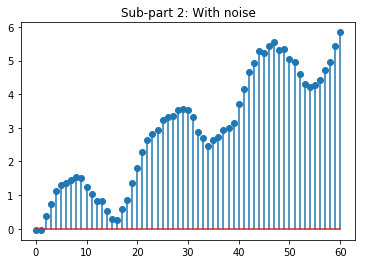

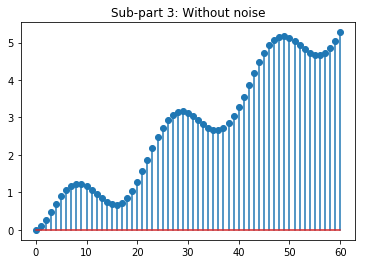

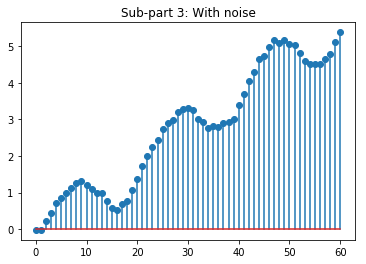

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

n=np.arange(61)
x1= 0.1*n + np.sin(0.1*n*np.pi)
w=np.random.uniform(-0.5,0.5,61)
x2=0.1*n+np.sin(0.1*n*np.pi) + w

num1=[0.4,0.3,0.2,0.1]
den1=[1,0,0,0]
sys1=(num1,den1)
r11=sig.lfilter(num1,den1,x1)
r12=sig.lfilter(num1,den1,x2)

plt.stem(n,r11)
plt.title('Sub-part 2: Without noise')
plt.show()

plt.stem(n,r12)
plt.title('Sub-part 2: With noise')
plt.show()

num1=[0.25,0]
den1=[1,-0.75]
sys1=(num1,den1)
r11=sig.lfilter(num1,den1,x1)
r12=sig.lfilter(num1,den1,x2)

plt.stem(n,r11)
plt.title('Sub-part 3: Without noise')
plt.show()

plt.stem(n,r12)
plt.title('Sub-part 3: With noise')
plt.show()

[1 2 3 2 1]


<StemContainer object of 3 artists>

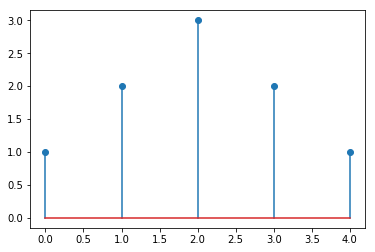

In [22]:
#example
x=[1,1,1]
h=[1,1,1]
print(np.convolve(x,h))
plt.stem(np.arange(len(np.convolve(x,h))),np.convolve(x,h))


Q.3.Determine and plot the Linear convolution of the following sequences 
<ul>
(a)<li>$x[n] =[1, 1, 0, 1, 1]; -2 ≤ n ≤ 2 $  </li> and <li>$ h[n] =[1, -2, -3, 4];-3 ≤ n ≤ 0;$ </li> 
(b)<li>$x[n] = h[n]=a^nu[n],    0≤ n ≤ 29 $  and |a|>1 </li>  


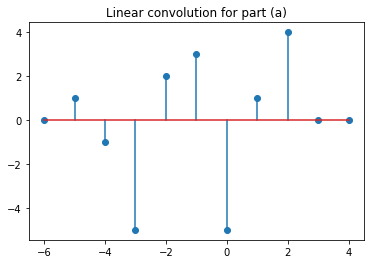

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n=np.arange(-6, 5, 1)
x=[0,1,1,0,1,1]
h=[1,-2,-3,4,0,0]
res=np.convolve(x,h)
plt.stem(n,res)
plt.title('Linear convolution for part (a)')
plt.show()

read about auto-correlation
np.correlate?

#read about cross-correlation

HINT:auto-corelation is cross-corelation of signal with itself

Q.4.Determine and plot the auto-correlation and Cross correlation of the following sequences 
<ul>
<li>$x[n] =[1, 4, 1, 3];-2≤n≤1 $ </li> and <li>$ y[n] =[1, 2, 1, 4];-3 ≤ n ≤ 0;$ </li> 
 


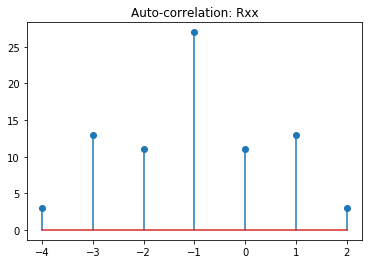

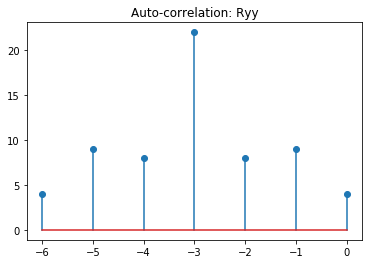

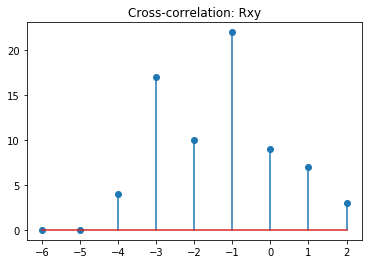

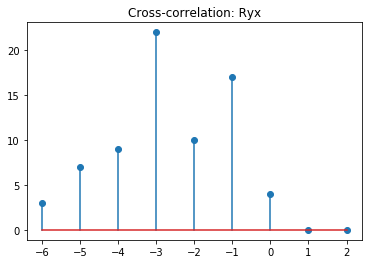

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

x=[1,4,1,3]
n=np.arange(-4,3,1)
Rxx=np.correlate(x,x,mode='full')
plt.stem(n,Rxx)
plt.title('Auto-correlation: Rxx')
plt.show()

y=[1,2,1,4]
n=np.arange(-6,1,1)
Ryy=np.correlate(y,y,mode='full')
plt.stem(n,Ryy)
plt.title('Auto-correlation: Ryy')
plt.show()

x=[0,1,4,1,3]
y=[1,2,1,4,0]
n=np.arange(-6,3,1)
Rxy=np.correlate(x,y,mode='full')
plt.stem(n,Rxy)
plt.title('Cross-correlation: Rxy')
plt.show()

Ryx=np.correlate(y,x,mode='full')
plt.stem(n,Ryx)
plt.title('Cross-correlation: Ryx')
plt.show()